In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-dataset-for-outlier-removal/placement.csv


In [2]:
df = pd.read_csv('/kaggle/input/placement-dataset-for-outlier-removal/placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

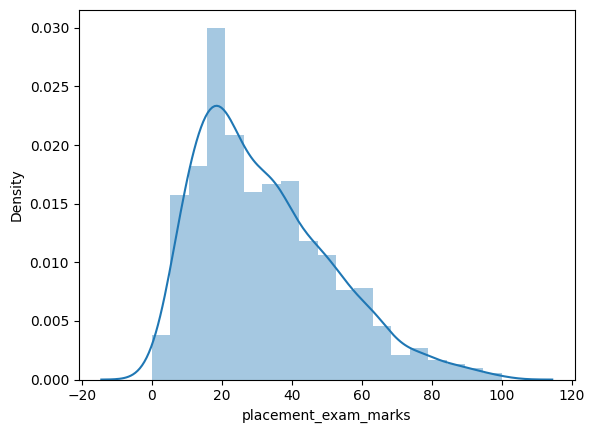

In [9]:
sns.distplot(df['placement_exam_marks'])

In [10]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [11]:
upperlimit = df['placement_exam_marks'].quantile(0.975)
lowerlimit = df['placement_exam_marks'].quantile(0.025)

### here either we can trim the rows or we can cap them, capping with percentile method is called as WINSERIZATION

In [15]:
df['placement_marks_capped'] = np.where( df['placement_exam_marks'] > upperlimit,
                                        upperlimit , 
                                        (np.where( df['placement_exam_marks'] < lowerlimit,
                                                  lowerlimit,
                                                  df['placement_exam_marks'])
                                        ) )

<Axes: xlabel='placement_marks_capped', ylabel='Density'>

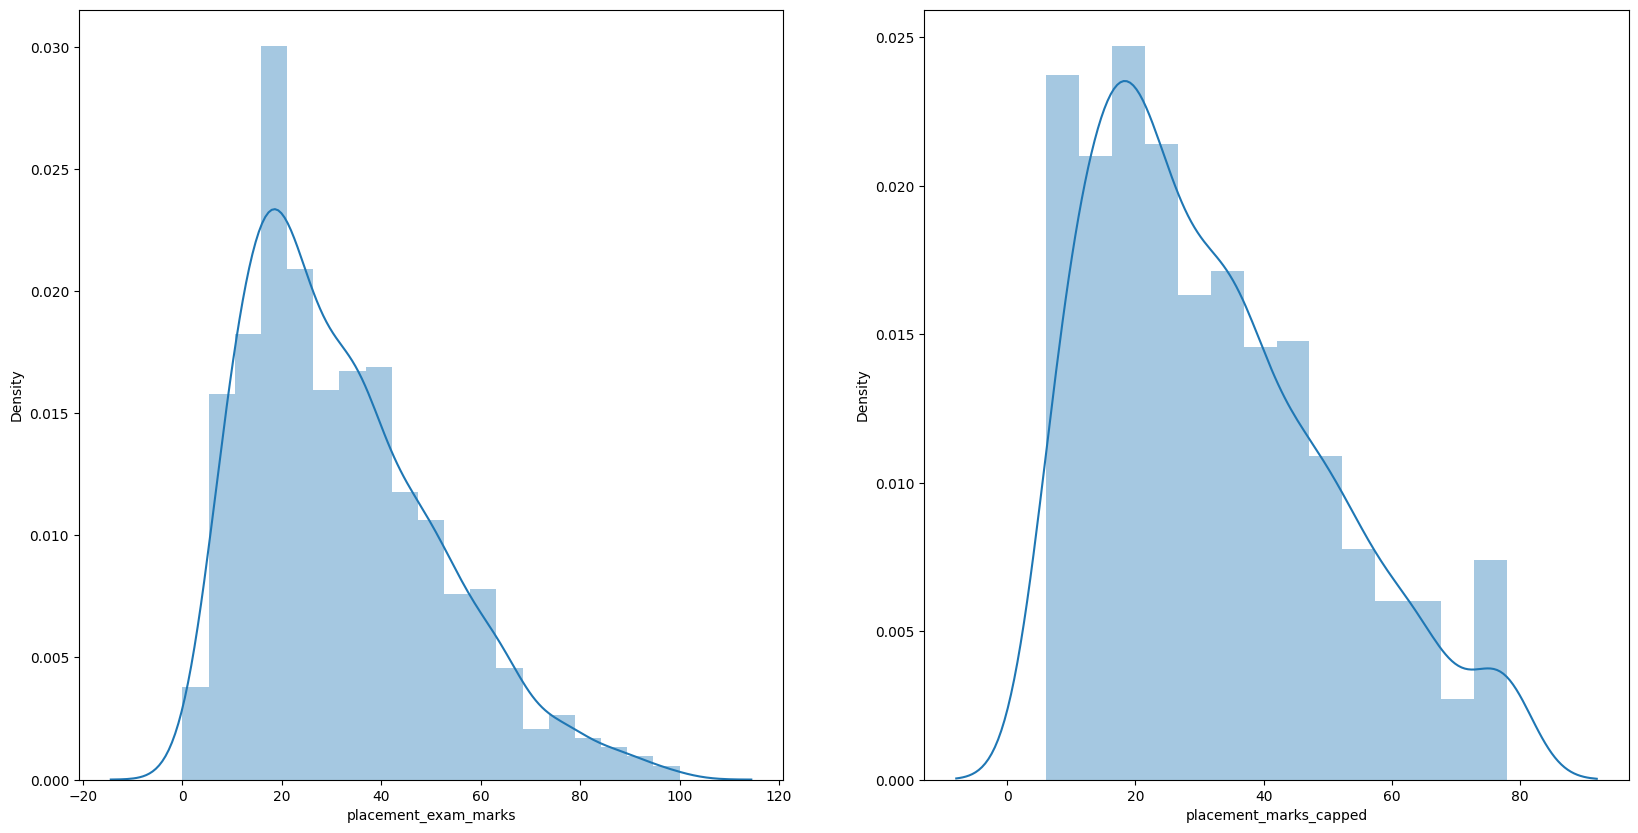

In [18]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(1,2,2)
sns.distplot(df['placement_marks_capped'])